In [17]:
import os
# Get the current working directory
current_path = os.getcwd()

# Define the relative paths to your data and .venv folders
data_path = os.path.join(current_path, 'data')
venv_path = os.path.join(current_path, '.venv')

# Use the relative paths in your code
OPENSLIDE_PATH = os.path.join(venv_path, 'Lib', 'site-packages', 'openslide-win64-20230414', 'bin')

if hasattr(os, 'add_dll_directory'):
    with os.add_dll_directory(OPENSLIDE_PATH):
        import openslide
else:
    import openslide
import utils.preprocessing as pp
from openslide import open_slide
import matplotlib.pyplot as plt
import numpy as np

In [13]:
slide_path = os.path.join(data_path, 'training', 'tumor', 'tumor_001.tif')
ann_path = os.path.join(data_path, 'training', 'lesion_annotations_training',
                         'tumor_001.xml')

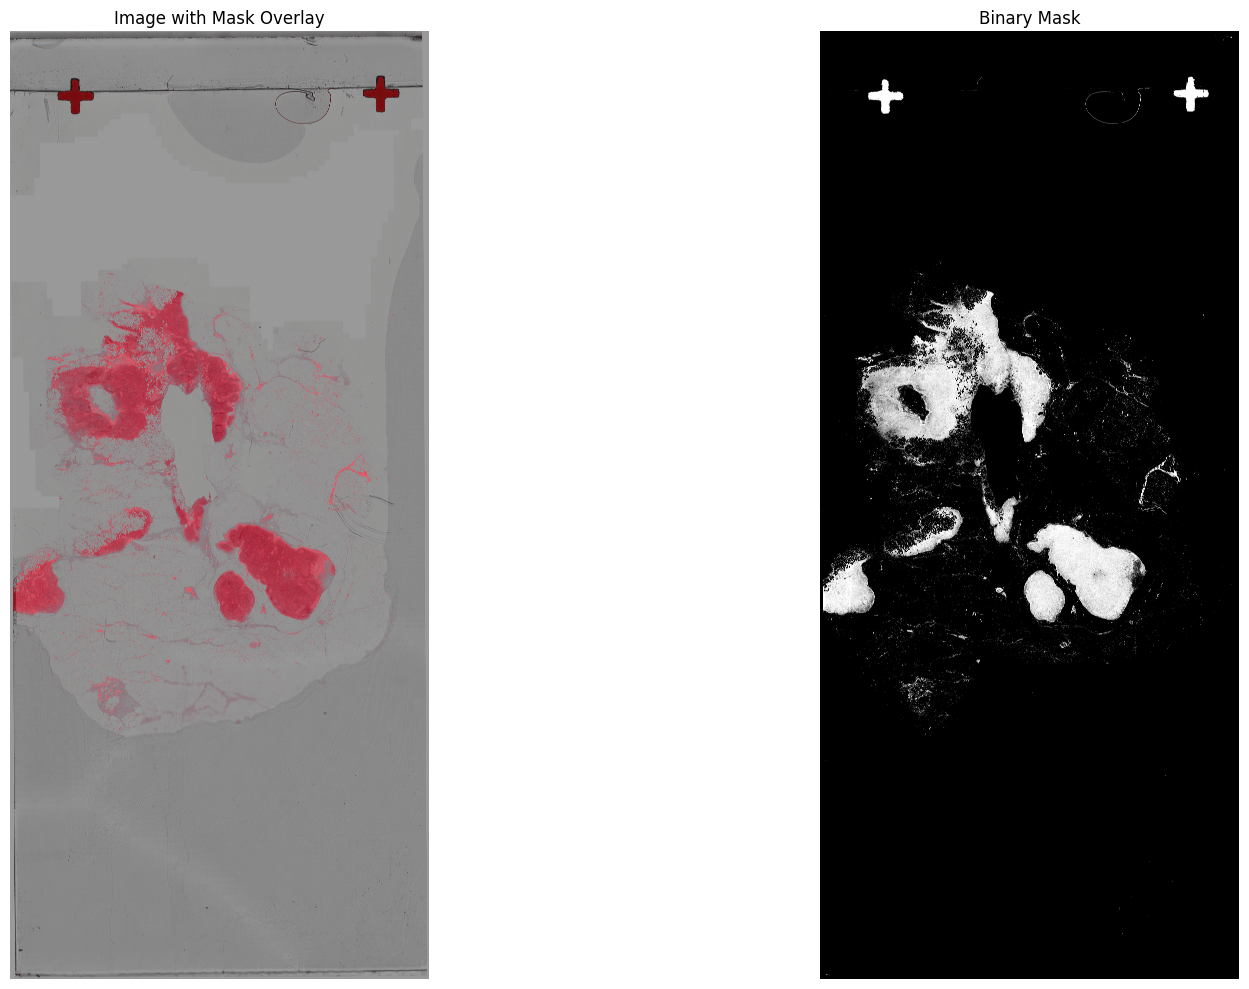

In [12]:
slide = open_slide(slide_path)
mask = pp.foreground_background_segmentation(slide_path, output_level=3)
pp.visualize_mask_on_slide_side_by_side(slide, mask, level=3)

In [14]:
polygons = pp.annotations_to_coordinates(ann_path)
p_samples, p_sample_origins = pp.sample_positive_patches(slide_path, polygons, 256, 10)

In [15]:
gt_mask = pp.coordinates_to_mask(polygons, slide.dimensions)
p_sample_labels = pp.assign_labels(256, p_sample_origins[0], gt_mask)

In [20]:
pp.visualise_patch_and_label(p_samples[0], p_sample_labels)

AttributeError: module 'utils.preprocessing' has no attribute 'visualise_patch_and_label'